In [2]:
import speech_recognition as sr
import pyttsx3
import sklearn
import matplotlib
import seaborn as sns

print("✅ All packages are working!")


✅ All packages are working!


In [1]:
# Phase 1: Import Libraries and Setup
# Run this cell first to import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
import os
import subprocess
import webbrowser
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Libraries imported successfully!")
print("Next: Run Phase 2 to check system requirements")

✅ Libraries imported successfully!
Next: Run Phase 2 to check system requirements


In [2]:
# Phase 2: System Requirements Check
# This cell checks if required libraries are installed

def check_requirements():
    """Check if all required libraries are available"""
    requirements = {
        'vosk': 'pip install vosk',
        'pyaudio': 'pip install pyaudio',
        'pyttsx3': 'pip install pyttsx3'
    }
    
    missing = []
    available = []
    
    for lib, install_cmd in requirements.items():
        try:
            __import__(lib)
            available.append(lib)
            print(f"✅ {lib} - Available")
        except ImportError:
            missing.append((lib, install_cmd))
            print(f"❌ {lib} - Missing")
    
    if missing:
        print("\n🔧 INSTALLATION REQUIRED:")
        print("-" * 30)
        for lib, cmd in missing:
            print(f"Install {lib}: {cmd}")
        
        print("\n📝 Additional Notes:")
        print("- For pyaudio issues on Windows: pip install pipwin && pipwin install pyaudio")
        print("- On Linux: sudo apt-get install portaudio19-dev python3-pyaudio")
        print("- On macOS: brew install portaudio")
        return False
    else:
        print("\n🎉 All requirements satisfied!")
        return True

# Run the check
requirements_ok = check_requirements()

if requirements_ok:
    print("\n➡️  Next: Run Phase 3 to download Vosk model")
else:
    print("\n⚠️  Please install missing libraries before proceeding")

✅ vosk - Available
✅ pyaudio - Available
✅ pyttsx3 - Available

🎉 All requirements satisfied!

➡️  Next: Run Phase 3 to download Vosk model


In [3]:
# Phase 3: Vosk Model Setup and Download Instructions
# This cell provides instructions for downloading and setting up Vosk models

import os
import urllib.request
import zipfile
from pathlib import Path

def show_model_instructions():
    """Display instructions for downloading Vosk models"""
    print("📥 VOSK MODEL SETUP")
    print("=" * 50)
    print("""
Available Models (English):
1. Small Model (~40MB) - Fast, less accurate
   vosk-model-small-en-us-0.15
   
2. Medium Model (~1.8GB) - Good balance
   vosk-model-en-us-0.22
   
3. Large Model (~3.2GB) - Most accurate
   vosk-model-en-us-daanzu-20200905

Download Steps:
1. Visit: https://alphacephei.com/vosk/models
2. Download your preferred model
3. Extract to a folder (e.g., ./models/)
4. Note the path to the extracted folder
    """)

def check_model_path(model_path):
    """Check if model path exists and is valid"""
    if not model_path:
        return False, "No model path provided"
    
    if not os.path.exists(model_path):
        return False, f"Path does not exist: {model_path}"
    
    # Check for required Vosk model files
    required_files = ['final.mdl', 'conf', 'am']
    missing_files = []
    
    for file in required_files:
        if not os.path.exists(os.path.join(model_path, file)):
            missing_files.append(file)
    
    if missing_files:
        return False, f"Missing model files: {missing_files}"
    
    return True, "Valid Vosk model found"

def setup_model_path():
    """Interactive model path setup"""
    print("\n🔍 MODEL PATH SETUP")
    print("-" * 25)
    
    # Common model locations to check
    common_paths = [
        './models/vosk-model-en-us-0.22',
        './models/vosk-model-small-en-us-0.15',
        './vosk-model-en-us-0.22',
        './vosk-model-small-en-us-0.15'
    ]
    
    print("Checking common model locations...")
    for path in common_paths:
        is_valid, message = check_model_path(path)
        if is_valid:
            print(f"✅ Found model at: {path}")
            return path
        else:
            print(f"❌ {path}: Not found")
    
    print("\n📝 Manual Setup Required:")
    print("1. Download a model from https://alphacephei.com/vosk/models")
    print("2. Extract it to a folder")
    print("3. Update MODEL_PATH variable below")
    
    return None

# Show instructions
show_model_instructions()

# Try to find model automatically
MODEL_PATH = setup_model_path()

if MODEL_PATH:
    print(f"\n🎯 Using model: {MODEL_PATH}")
    print("➡️  Next: Run Phase 4 to create the command dataset")
else:
    print("\n⚙️  Manual setup needed:")
    print("MODEL_PATH = '/path/to/your/vosk-model'  # Update this line")
    print("Then run Phase 4")

# You can manually set the model path here if needed
# MODEL_PATH = "/path/to/your/vosk-model"  # Uncomment and update this line

📥 VOSK MODEL SETUP

Available Models (English):
1. Small Model (~40MB) - Fast, less accurate
   vosk-model-small-en-us-0.15

2. Medium Model (~1.8GB) - Good balance
   vosk-model-en-us-0.22

3. Large Model (~3.2GB) - Most accurate
   vosk-model-en-us-daanzu-20200905

Download Steps:
1. Visit: https://alphacephei.com/vosk/models
2. Download your preferred model
3. Extract to a folder (e.g., ./models/)
4. Note the path to the extracted folder
    

🔍 MODEL PATH SETUP
-------------------------
Checking common model locations...
❌ ./models/vosk-model-en-us-0.22: Not found
❌ ./models/vosk-model-small-en-us-0.15: Not found
❌ ./vosk-model-en-us-0.22: Not found
❌ ./vosk-model-small-en-us-0.15: Not found

📝 Manual Setup Required:
1. Download a model from https://alphacephei.com/vosk/models
2. Extract it to a folder
3. Update MODEL_PATH variable below

⚙️  Manual setup needed:
MODEL_PATH = '/path/to/your/vosk-model'  # Update this line
Then run Phase 4


In [4]:
# Phase 4: Create Command Dataset
# This cell creates the training dataset for voice commands

def create_command_dataset():
    """Create the training dataset for voice commands"""
    
    command_data = {
        'text': [
            # Google/Search commands
            'open google', 'google search', 'launch google', 'start google', 'go to google',
            'search for', 'look up', 'find information', 'google search for', 'search query',
            
            # YouTube commands
            'open youtube', 'youtube video', 'launch youtube', 'start youtube', 'go to youtube',
            'watch video', 'play video', 'video player', 'youtube please', 'show videos',
            
            # Calculator commands
            'open calculator', 'launch calculator', 'start calculator', 'calculate', 'calculator please',
            'math calculator', 'do math', 'arithmetic', 'compute', 'calculation',
            
            # Notepad/Text editor commands
            'open notepad', 'launch notepad', 'start notepad', 'text editor', 'notepad please',
            'write text', 'text file', 'create document', 'edit text', 'word processor',
            
            # Time commands
            'what time is it', 'current time', 'tell me time', 'time please', 'what is the time',
            'show time', 'time now', 'current hour', 'what time', 'check time',
            
            # Weather commands
            'weather forecast', 'weather today', 'current weather', 'weather update', 'how is weather',
            'weather report', 'temperature today', 'is it raining', 'weather conditions', 'climate',
            
            # Music commands
            'play music', 'start music', 'music player', 'play songs', 'music please',
            'play audio', 'sound music', 'musical', 'listen music', 'music app',
            
            # Close/Exit commands
            'close application', 'exit program', 'quit application', 'stop program', 'close app',
            'shutdown', 'exit', 'quit', 'stop listening', 'end program',
            
            # Volume commands
            'volume up', 'increase volume', 'louder please', 'turn up volume', 'volume higher',
            'make louder', 'increase sound', 'up volume', 'raise volume', 'boost volume',
            'volume down', 'decrease volume', 'quieter please', 'turn down volume', 'volume lower',
            'make quieter', 'decrease sound', 'down volume', 'reduce volume', 'lower volume',
            
            # Browser commands
            'open browser', 'launch browser', 'start browser', 'web browser', 'internet browser',
            'browse web', 'internet', 'web surfing', 'online', 'web page'
        ],
        'intent': [
            # Google/Search intents
            'open_google', 'open_google', 'open_google', 'open_google', 'open_google',
            'web_search', 'web_search', 'web_search', 'web_search', 'web_search',
            
            # YouTube intents
            'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube',
            'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube',
            
            # Calculator intents
            'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator',
            'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator',
            
            # Notepad intents
            'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad',
            'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad',
            
            # Time intents
            'get_time', 'get_time', 'get_time', 'get_time', 'get_time',
            'get_time', 'get_time', 'get_time', 'get_time', 'get_time',
            
            # Weather intents
            'get_weather', 'get_weather', 'get_weather', 'get_weather', 'get_weather',
            'get_weather', 'get_weather', 'get_weather', 'get_weather', 'get_weather',
            
            # Music intents
            'play_music', 'play_music', 'play_music', 'play_music', 'play_music',
            'play_music', 'play_music', 'play_music', 'play_music', 'play_music',
            
            # Close intents
            'close_app', 'close_app', 'close_app', 'close_app', 'close_app',
            'close_app', 'close_app', 'close_app', 'close_app', 'close_app',
            
            # Volume intents
            'volume_up', 'volume_up', 'volume_up', 'volume_up', 'volume_up',
            'volume_up', 'volume_up', 'volume_up', 'volume_up', 'volume_up',
            'volume_down', 'volume_down', 'volume_down', 'volume_down', 'volume_down',
            'volume_down', 'volume_down', 'volume_down', 'volume_down', 'volume_down',
            
            # Browser intents
            'open_browser', 'open_browser', 'open_browser', 'open_browser', 'open_browser',
            'open_browser', 'open_browser', 'open_browser', 'open_browser', 'open_browser'
        ]
    }
    
    return command_data

# Create the dataset
print("🗂️  CREATING COMMAND DATASET")
print("=" * 40)

command_data = create_command_dataset()
df = pd.DataFrame(command_data)

print(f"📊 Dataset created with {len(df)} command examples")
print(f"🎯 Number of unique intents: {df['intent'].nunique()}")

# Show dataset overview
print("\n📋 Dataset Overview:")
print(df['intent'].value_counts())

# Show sample commands for each intent
print("\n💬 Sample Commands by Intent:")
print("-" * 35)
for intent in df['intent'].unique():
    samples = df[df['intent'] == intent]['text'].head(3).tolist()
    print(f"{intent}: {', '.join(samples)}")

print("\n➡️  Next: Run Phase 5 to train the KNN classifier")

🗂️  CREATING COMMAND DATASET
📊 Dataset created with 110 command examples
🎯 Number of unique intents: 12

📋 Dataset Overview:
intent
open_calculator    10
open_youtube       10
get_time           10
open_notepad       10
close_app          10
volume_up          10
get_weather        10
play_music         10
volume_down        10
open_browser       10
open_google         5
web_search          5
Name: count, dtype: int64

💬 Sample Commands by Intent:
-----------------------------------
open_google: open google, google search, launch google
web_search: search for, look up, find information
open_youtube: open youtube, youtube video, launch youtube
open_calculator: open calculator, launch calculator, start calculator
open_notepad: open notepad, launch notepad, start notepad
get_time: what time is it, current time, tell me time
get_weather: weather forecast, weather today, current weather
play_music: play music, start music, music player
close_app: close application, exit program, quit applic

🤖 TRAINING KNN CLASSIFIER
📝 Vectorizing text data...
✅ Created 100 features from 110 samples
📊 Training set: 88 samples
📊 Test set: 22 samples
🎯 Training KNN classifier...
🎉 Training completed!
📈 Accuracy: 0.64

📊 DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

      close_app       1.00      0.50      0.67         2
       get_time       1.00      1.00      1.00         2
    get_weather       1.00      1.00      1.00         2
   open_browser       1.00      1.00      1.00         2
open_calculator       0.20      1.00      0.33         2
    open_google       1.00      1.00      1.00         1
   open_notepad       0.00      0.00      0.00         2
   open_youtube       1.00      1.00      1.00         2
     play_music       0.00      0.00      0.00         2
    volume_down       0.00      0.00      0.00         2
      volume_up       1.00      0.50      0.67         2
     web_search       1.00      1.00      1.00         1

       accur

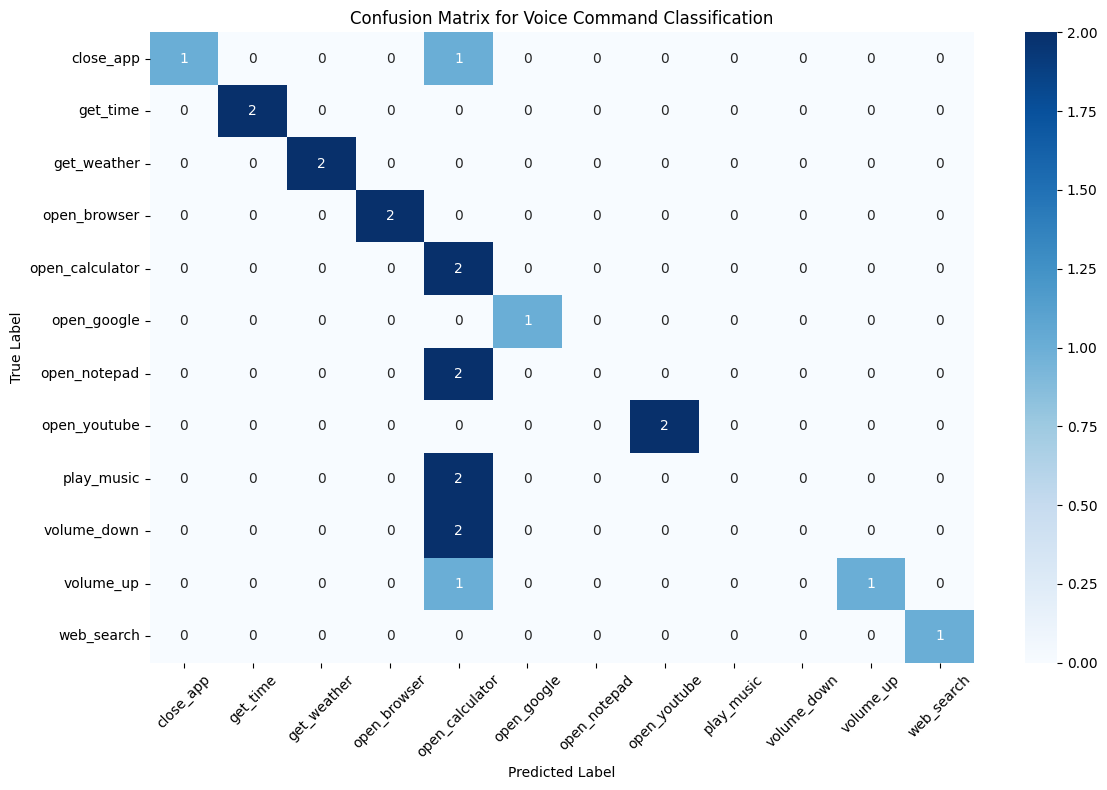


🔍 FEATURE ANALYSIS
Total features: 100

Sample TF-IDF features (top 10):
               app  application  boost  boost volume  browse  browse web  \
text                                                                       
open google    0.0          0.0    0.0           0.0     0.0         0.0   
google search  0.0          0.0    0.0           0.0     0.0         0.0   
launch google  0.0          0.0    0.0           0.0     0.0         0.0   
start google   0.0          0.0    0.0           0.0     0.0         0.0   
go to google   0.0          0.0    0.0           0.0     0.0         0.0   

               browser  calculate  calculator  check time  
text                                                       
open google        0.0        0.0         0.0         0.0  
google search      0.0        0.0         0.0         0.0  
launch google      0.0        0.0         0.0         0.0  
start google       0.0        0.0         0.0         0.0  
go to google       0.0        0.0

In [5]:
# Phase 5: Train KNN Classifier
# This cell trains the K-Nearest Neighbors classifier for command recognition

def train_classifier(df):
    """Train the KNN classifier with TF-IDF vectorization"""
    
    print("🤖 TRAINING KNN CLASSIFIER")
    print("=" * 35)
    
    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(
        max_features=100,
        stop_words='english',
        ngram_range=(1, 2)  # Include bigrams for better context
    )
    
    # Vectorize the text data
    print("📝 Vectorizing text data...")
    X = vectorizer.fit_transform(df['text'])
    y = df['intent']
    
    print(f"✅ Created {X.shape[1]} features from {X.shape[0]} samples")
    
    # Split data for evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"📊 Training set: {X_train.shape[0]} samples")
    print(f"📊 Test set: {X_test.shape[0]} samples")
    
    # Train KNN classifier
    print("🎯 Training KNN classifier...")
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    
    # Evaluate the classifier
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"🎉 Training completed!")
    print(f"📈 Accuracy: {accuracy:.2f}")
    
    return vectorizer, knn_classifier, X_test, y_test, y_pred

def show_classification_report(y_test, y_pred, knn_classifier):
    """Display detailed classification metrics"""
    
    print("\n📊 DETAILED CLASSIFICATION REPORT")
    print("=" * 40)
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=knn_classifier.classes_,
                yticklabels=knn_classifier.classes_)
    plt.title('Confusion Matrix for Voice Command Classification')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def analyze_features(vectorizer, df):
    """Analyze the most important features"""
    
    print("\n🔍 FEATURE ANALYSIS")
    print("=" * 25)
    
    feature_names = vectorizer.get_feature_names_out()
    print(f"Total features: {len(feature_names)}")
    
    # Show sample TF-IDF matrix
    tfidf_matrix = vectorizer.transform(df['text'][:5])
    sample_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=feature_names,
        index=df['text'][:5]
    )
    
    print(f"\nSample TF-IDF features (top 10):")
    print(sample_df.iloc[:, :10].round(3))
    
    # Find most common features
    feature_sums = np.array(vectorizer.transform(df['text']).sum(axis=0)).flatten()
    top_features_idx = feature_sums.argsort()[-20:][::-1]
    
    print(f"\nTop 20 most important features:")
    for i, idx in enumerate(top_features_idx):
        print(f"{i+1:2d}. {feature_names[idx]} ({feature_sums[idx]:.2f})")

# Train the classifier
vectorizer, knn_classifier, X_test, y_test, y_pred = train_classifier(df)

# Show detailed results
show_classification_report(y_test, y_pred, knn_classifier)

# Analyze features
analyze_features(vectorizer, df)

print("\n➡️  Next: Run Phase 6 to test the classifier")

🧪 CLASSIFIER TESTING
Testing with sample commands:
------------------------------
'open google' → open_calculator (🟡 Medium: 0.600)
'google search' → web_search (🟢 High: 0.763)
'what time is it' → get_time (🟢 High: 1.000)
'launch calculator' → open_calculator (🟡 Medium: 0.603)
'play some music' → open_calculator (🟡 Medium: 0.505)
'turn up the volume' → open_notepad (🟢 High: 0.750)
'search for python tutorial' → web_search (🟡 Medium: 0.617)
'open youtube videos' → open_youtube (🟡 Medium: 0.602)
'quit the program' → close_app (🟡 Medium: 0.525)
'weather forecast today' → get_weather (🟡 Medium: 0.543)

🎮 CUSTOM TESTING
You can now test custom commands using:
test_single_command('your command here')

Try these examples:
test_single_command('launch youtube')
test_single_command('what is the current time')
test_single_command('search for machine learning')


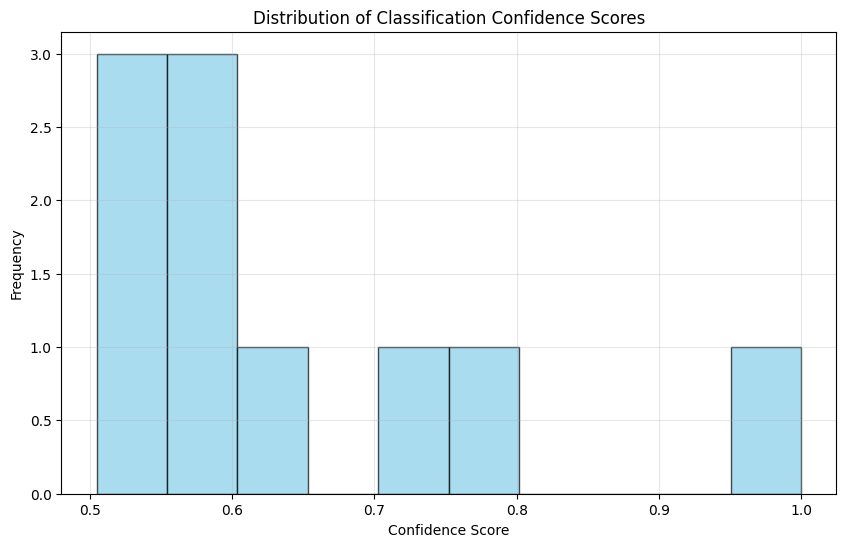


📈 Average confidence: 0.651
📊 Confidence range: 0.505 - 1.000

➡️  Next: Run Phase 7 to set up the speech recognition system


In [6]:
# Phase 6: Test the Classifier
# This cell allows you to test the trained classifier with sample commands

def test_command_classification(text, vectorizer, knn_classifier):
    """Test classification of a single command"""
    
    if not text.strip():
        return None, 0.0
    
    # Vectorize the input text
    text_vector = vectorizer.transform([text.lower()])
    
    # Get prediction
    prediction = knn_classifier.predict(text_vector)[0]
    
    # Get confidence (based on distance to nearest neighbors)
    distances, indices = knn_classifier.kneighbors(text_vector)
    confidence = 1 / (1 + np.mean(distances))  # Convert distance to confidence
    
    return prediction, confidence

def interactive_classifier_test(vectorizer, knn_classifier):
    """Test the classifier with various commands"""
    
    print("🧪 CLASSIFIER TESTING")
    print("=" * 30)
    
    test_commands = [
        "open google",
        "google search",
        "what time is it",
        "launch calculator",
        "play some music",
        "turn up the volume",
        "search for python tutorial",
        "open youtube videos",
        "quit the program",
        "weather forecast today"
    ]
    
    print("Testing with sample commands:")
    print("-" * 30)
    
    results = []
    
    for command in test_commands:
        intent, confidence = test_command_classification(command, vectorizer, knn_classifier)
        
        # Determine confidence level
        if confidence > 0.7:
            conf_level = "🟢 High"
        elif confidence > 0.4:
            conf_level = "🟡 Medium"
        else:
            conf_level = "🔴 Low"
            
        print(f"'{command}' → {intent} ({conf_level}: {confidence:.3f})")
        
        results.append({
            'command': command,
            'intent': intent,
            'confidence': confidence
        })
    
    return results

def custom_command_tester(vectorizer, knn_classifier):
    """Function to test custom commands"""
    
    def test_single_command(command):
        intent, confidence = test_command_classification(command, vectorizer, knn_classifier)
        
        print(f"\n🎯 Command: '{command}'")
        print(f"📋 Intent: {intent}")
        print(f"📊 Confidence: {confidence:.3f}")
        
        if confidence > 0.4:
            print("✅ Command recognized with good confidence")
        else:
            print("⚠️  Low confidence - command might not be recognized")
    
    return test_single_command

# Run interactive testing
test_results = interactive_classifier_test(vectorizer, knn_classifier)

# Create a custom tester function
test_single_command = custom_command_tester(vectorizer, knn_classifier)

print("\n🎮 CUSTOM TESTING")
print("=" * 20)
print("You can now test custom commands using:")
print("test_single_command('your command here')")

print("\nTry these examples:")
print("test_single_command('launch youtube')")
print("test_single_command('what is the current time')")
print("test_single_command('search for machine learning')")

# Show classification confidence distribution
confidence_scores = [result['confidence'] for result in test_results]

plt.figure(figsize=(10, 6))
plt.hist(confidence_scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Classification Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📈 Average confidence: {np.mean(confidence_scores):.3f}")
print(f"📊 Confidence range: {min(confidence_scores):.3f} - {max(confidence_scores):.3f}")

print("\n➡️  Next: Run Phase 7 to set up the speech recognition system")

Speech-to-Text Voice Command System with Vosk

1. Setting up dependencies...

2. Setting up demonstration...
Creating voice command system (model will be loaded when provided)...
Please download a Vosk model first!
Visit: https://alphacephei.com/vosk/models
Recommended: vosk-model-en-us-0.22 for English
Training KNN classifier...
Classifier trained with 60 command examples

3. Available Commands:
open_google: open google, google search, ...
open_youtube: open youtube, youtube video, ...
open_calculator: open calculator, launch calculator, ...
open_notepad: open notepad, launch notepad, ...
get_time: what time is it, current time, ...
get_weather: weather forecast, weather today, ...
play_music: play music, start music, ...
close_app: close application, exit program, ...
volume_up: volume up, increase volume, ...
volume_down: volume down, decrease volume, ...
open_browser: open browser, launch browser, ...
web_search: search for, look up, ...

4. Evaluating KNN Classifier...
Classifier 

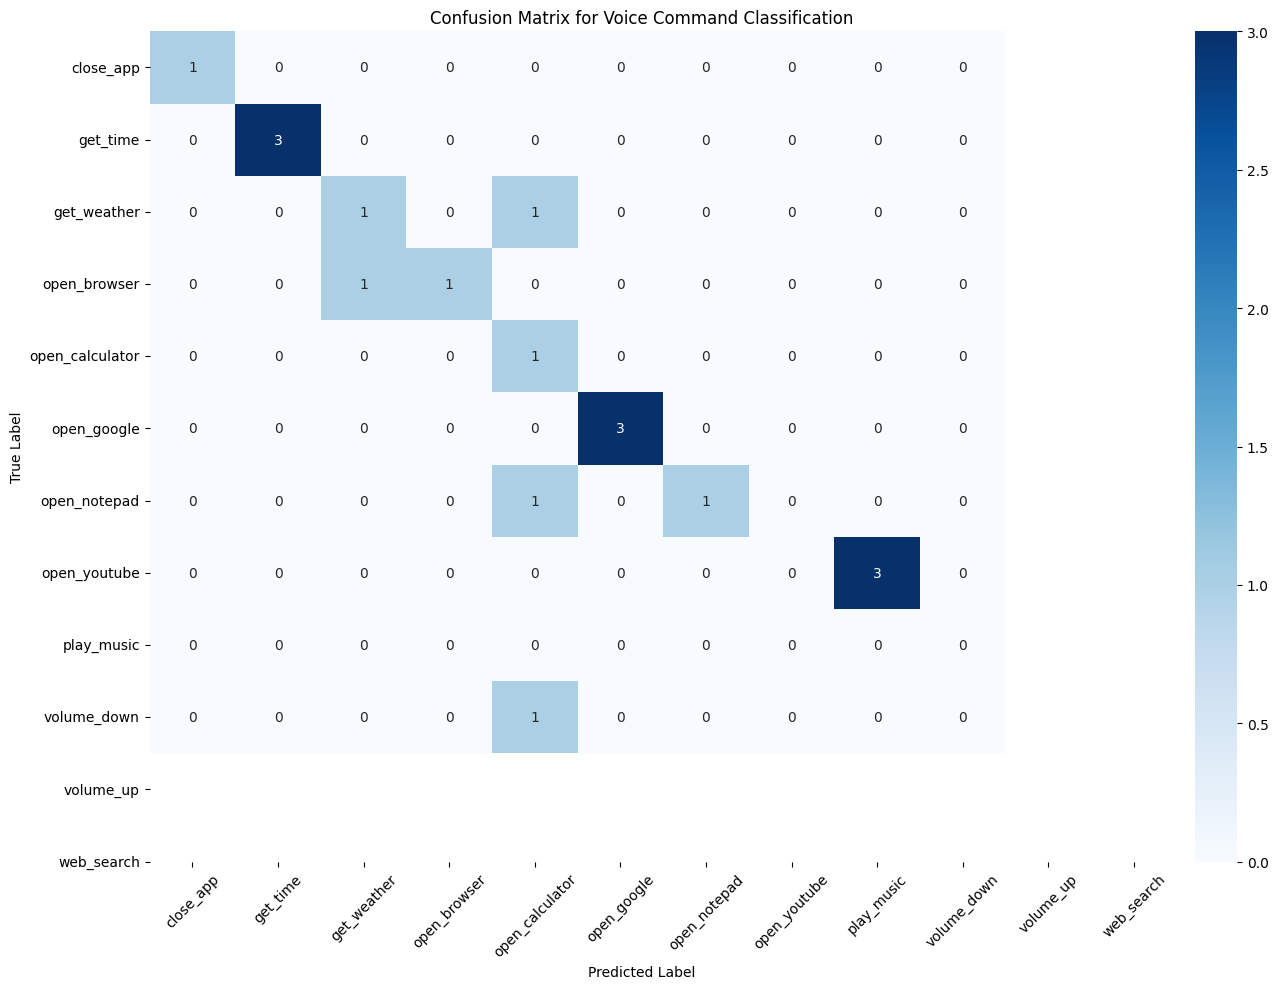


5. Feature Analysis...
Number of features extracted: 44
Sample features: ['app', 'application', 'browser', 'calculate', 'calculator', 'close', 'current', 'decrease', 'editor', 'exit', 'forecast', 'google', 'higher', 'increase', 'information', 'internet', 'launch', 'look', 'louder', 'lower']

Sample TF-IDF Matrix (top 10 features):
               app  application  browser  calculate  calculator  close  \
text                                                                     
open google    0.0          0.0      0.0        0.0         0.0    0.0   
google search  0.0          0.0      0.0        0.0         0.0    0.0   
launch google  0.0          0.0      0.0        0.0         0.0    0.0   
start google   0.0          0.0      0.0        0.0         0.0    0.0   
go to google   0.0          0.0      0.0        0.0         0.0    0.0   

               current  decrease  editor  exit  
text                                            
open google        0.0       0.0     0.0   0.0  


In [9]:
# Speech-to-Text Voice Command System with Vosk and KNN
# This notebook implements an offline voice command system using Vosk Speech Recognition and KNN classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import json
import pyaudio
import vosk
import pyttsx3
import webbrowser
import os
import subprocess
import threading
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Speech-to-Text Voice Command System with Vosk")
print("=" * 55)

# 1. SETUP AND DEPENDENCIES
print("\n1. Setting up dependencies...")

class VoskVoiceCommandSystem:
    def __init__(self, model_path=None):
        """Initialize the voice command system with Vosk"""
        # Vosk setup
        if model_path is None:
            print("Please download a Vosk model first!")
            print("Visit: https://alphacephei.com/vosk/models")
            print("Recommended: vosk-model-en-us-0.22 for English")
            self.model = None
        else:
            if not os.path.exists(model_path):
                print(f"Model path {model_path} does not exist!")
                self.model = None
            else:
                self.model = vosk.Model(model_path)
                print(f"Loaded Vosk model from: {model_path}")
        
        # Audio setup
        self.audio_format = pyaudio.paInt16
        self.channels = 1
        self.rate = 16000
        self.chunk = 1024
        self.audio = pyaudio.PyAudio()
        
        # TTS setup
        self.tts_engine = pyttsx3.init()
        
        # ML setup
        self.vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        self.knn_classifier = KNeighborsClassifier(n_neighbors=3)
        self.is_listening = False
        self.commands_log = []
        
        # Predefined command dataset
        self.command_data = {
            'text': [
                'open google', 'google search', 'launch google', 'start google', 'go to google',
                'open youtube', 'youtube video', 'launch youtube', 'start youtube', 'go to youtube',
                'open calculator', 'launch calculator', 'start calculator', 'calculate', 'calculator please',
                'open notepad', 'launch notepad', 'start notepad', 'text editor', 'notepad please',
                'what time is it', 'current time', 'tell me time', 'time please', 'what is the time',
                'weather forecast', 'weather today', 'current weather', 'weather update', 'how is weather',
                'play music', 'start music', 'music player', 'play songs', 'music please',
                'close application', 'exit program', 'quit application', 'stop program', 'close app',
                'volume up', 'increase volume', 'louder please', 'turn up volume', 'volume higher',
                'volume down', 'decrease volume', 'quieter please', 'turn down volume', 'volume lower',
                'open browser', 'launch browser', 'start browser', 'web browser', 'internet browser',
                'search for', 'look up', 'find information', 'search query', 'google search for'
            ],
            'intent': [
                'open_google', 'open_google', 'open_google', 'open_google', 'open_google',
                'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube',
                'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator',
                'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad',
                'get_time', 'get_time', 'get_time', 'get_time', 'get_time',
                'get_weather', 'get_weather', 'get_weather', 'get_weather', 'get_weather',
                'play_music', 'play_music', 'play_music', 'play_music', 'play_music',
                'close_app', 'close_app', 'close_app', 'close_app', 'close_app',
                'volume_up', 'volume_up', 'volume_up', 'volume_up', 'volume_up',
                'volume_down', 'volume_down', 'volume_down', 'volume_down', 'volume_down',
                'open_browser', 'open_browser', 'open_browser', 'open_browser', 'open_browser',
                'web_search', 'web_search', 'web_search', 'web_search', 'web_search'
            ]
        }
        
        self.setup_classifier()
        
    def setup_classifier(self):
        """Train the KNN classifier with command data"""
        print("Training KNN classifier...")
        
        # Create DataFrame
        df = pd.DataFrame(self.command_data)
        
        # Vectorize text data
        X = self.vectorizer.fit_transform(df['text'])
        y = df['intent']
        
        # Train KNN classifier
        self.knn_classifier.fit(X, y)
        
        print(f"Classifier trained with {len(df)} command examples")
        
    def speak(self, text):
        """Convert text to speech"""
        print(f"Speaking: {text}")
        self.tts_engine.say(text)
        self.tts_engine.runAndWait()
        
    def setup_microphone(self):
        """Setup microphone for recording"""
        if self.model is None:
            print("No Vosk model loaded!")
            return None
            
        stream = self.audio.open(
            format=self.audio_format,
            channels=self.channels,
            rate=self.rate,
            input=True,
            frames_per_buffer=self.chunk
        )
        
        rec = vosk.KaldiRecognizer(self.model, self.rate)
        return stream, rec
        
    def listen_for_speech(self, timeout=5):
        """Listen for speech input using Vosk"""
        if self.model is None:
            print("No Vosk model loaded! Please provide a valid model path.")
            return None
            
        try:
            stream, rec = self.setup_microphone()
            if stream is None:
                return None
                
            print("Listening...")
            start_time = time.time()
            silence_count = 0
            
            while True:
                # Check timeout
                if time.time() - start_time > timeout:
                    break
                    
                data = stream.read(self.chunk, exception_on_overflow=False)
                
                if rec.AcceptWaveform(data):
                    result = json.loads(rec.Result())
                    text = result.get('text', '').strip()
                    
                    if text:
                        stream.stop_stream()
                        stream.close()
                        return text.lower()
                else:
                    # Check for partial results
                    partial = json.loads(rec.PartialResult())
                    partial_text = partial.get('partial', '').strip()
                    
                    if partial_text:
                        silence_count = 0
                    else:
                        silence_count += 1
                        
                    # If we have some partial text and silence, finalize
                    if silence_count > 20 and partial_text:
                        stream.stop_stream()
                        stream.close()
                        return partial_text.lower()
                        
            # Final result
            final_result = json.loads(rec.FinalResult())
            final_text = final_result.get('text', '').strip()
            
            stream.stop_stream()
            stream.close()
            
            return final_text.lower() if final_text else None
            
        except Exception as e:
            print(f"Error in speech recognition: {e}")
            return None
            
    def classify_command(self, text):
        """Classify the spoken command using KNN"""
        if not text:
            return None, 0.0
            
        # Vectorize the input text
        text_vector = self.vectorizer.transform([text])
        
        # Get prediction and probability
        prediction = self.knn_classifier.predict(text_vector)[0]
        
        # Get confidence (distance-based)
        distances, indices = self.knn_classifier.kneighbors(text_vector)
        confidence = 1 / (1 + np.mean(distances))  # Convert distance to confidence
        
        return prediction, confidence
        
    def execute_command(self, intent, original_text):
        """Execute the classified command"""
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        # Log the command
        self.commands_log.append({
            'timestamp': timestamp,
            'text': original_text,
            'intent': intent
        })
        
        print(f"Executing command: {intent}")
        
        try:
            if intent == 'open_google':
                webbrowser.open('https://www.google.com')
                self.speak("Opening Google")
                
            elif intent == 'open_youtube':
                webbrowser.open('https://www.youtube.com')
                self.speak("Opening YouTube")
                
            elif intent == 'open_browser':
                webbrowser.open('https://www.google.com')
                self.speak("Opening browser")
                
            elif intent == 'web_search':
                # Extract search query from the text
                search_terms = original_text.replace('search for', '').replace('look up', '').replace('find information', '').strip()
                if search_terms:
                    search_url = f"https://www.google.com/search?q={search_terms.replace(' ', '+')}"
                    webbrowser.open(search_url)
                    self.speak(f"Searching for {search_terms}")
                else:
                    webbrowser.open('https://www.google.com')
                    self.speak("Opening Google search")
                
            elif intent == 'open_calculator':
                if os.name == 'nt':  # Windows
                    subprocess.Popen(['calc'])
                elif os.name == 'posix':  # macOS/Linux
                    try:
                        subprocess.Popen(['gnome-calculator'])  # Linux
                    except:
                        try:
                            subprocess.Popen(['kcalc'])  # KDE
                        except:
                            subprocess.Popen(['open', '-a', 'Calculator'])  # macOS
                self.speak("Opening Calculator")
                
            elif intent == 'open_notepad':
                if os.name == 'nt':  # Windows
                    subprocess.Popen(['notepad'])
                elif os.name == 'posix':  # macOS/Linux
                    try:
                        subprocess.Popen(['gedit'])  # Linux
                    except:
                        try:
                            subprocess.Popen(['kate'])  # KDE
                        except:
                            subprocess.Popen(['open', '-a', 'TextEdit'])  # macOS
                self.speak("Opening text editor")
                
            elif intent == 'get_time':
                current_time = datetime.now().strftime("%I:%M %p")
                time_text = f"The current time is {current_time}"
                print(time_text)
                self.speak(time_text)
                
            elif intent == 'get_weather':
                self.speak("Opening weather website")
                webbrowser.open('https://weather.com')
                
            elif intent == 'play_music':
                self.speak("Opening music service")
                webbrowser.open('https://music.youtube.com')
                
            elif intent == 'close_app':
                self.speak("Stopping voice command system")
                self.is_listening = False
                
            elif intent == 'volume_up':
                self.speak("Volume up command received")
                # Platform-specific volume control could be implemented here
                
            elif intent == 'volume_down':
                self.speak("Volume down command received")
                # Platform-specific volume control could be implemented here
                
            else:
                self.speak("I'm not sure how to handle that command")
                
        except Exception as e:
            print(f"Error executing command: {e}")
            self.speak("Sorry, I couldn't execute that command")
            
    def start_listening(self):
        """Start the main listening loop"""
        if self.model is None:
            print("Cannot start listening - no Vosk model loaded!")
            return
            
        print("\nStarting voice command system...")
        self.speak("Voice command system activated. Say a command!")
        
        self.is_listening = True
        
        while self.is_listening:
            try:
                # Listen for speech
                text = self.listen_for_speech()
                
                if text:
                    print(f"Heard: '{text}'")
                    
                    # Classify the command
                    intent, confidence = self.classify_command(text)
                    
                    if intent and confidence > 0.2:  # Lower threshold for better recognition
                        print(f"Classified as: {intent} (confidence: {confidence:.2f})")
                        self.execute_command(intent, text)
                    else:
                        print("Command not recognized with sufficient confidence")
                        self.speak("I didn't understand that command")
                        
                time.sleep(0.5)  # Brief pause between listening cycles
                
            except KeyboardInterrupt:
                print("\nStopping...")
                self.is_listening = False
                break
                
        print("Voice command system stopped")
        
    def show_command_log(self):
        """Display the command execution log"""
        if self.commands_log:
            df_log = pd.DataFrame(self.commands_log)
            print("\nCommand Execution Log:")
            print(df_log.to_string(index=False))
            
            # Show command frequency
            intent_counts = df_log['intent'].value_counts()
            
            plt.figure(figsize=(12, 6))
            intent_counts.plot(kind='bar')
            plt.title('Command Usage Frequency')
            plt.xlabel('Intent')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("No commands executed yet")
            
    def test_microphone(self):
        """Test microphone and Vosk setup"""
        if self.model is None:
            print("No model loaded for testing!")
            return
            
        print("Testing microphone and Vosk recognition...")
        print("Say something and I'll try to recognize it...")
        
        text = self.listen_for_speech(timeout=10)
        if text:
            print(f"Successfully recognized: '{text}'")
            intent, confidence = self.classify_command(text)
            print(f"Classified as: {intent} with confidence: {confidence:.2f}")
        else:
            print("No speech recognized")

# 2. MODEL DOWNLOAD HELPER
def download_vosk_model():
    """Instructions for downloading Vosk model"""
    print("\nVOSK MODEL DOWNLOAD INSTRUCTIONS:")
    print("=" * 40)
    print("""
    1. Visit: https://alphacephei.com/vosk/models
    2. Download a model for your language (recommended for English):
       - vosk-model-en-us-0.22 (larger, more accurate)
       - vosk-model-small-en-us-0.15 (smaller, faster)
    
    3. Extract the downloaded model to a folder
    4. Use the folder path when creating VoskVoiceCommandSystem
    
    Example:
    # If you extracted to ./models/vosk-model-en-us-0.22/
    voice_system = VoskVoiceCommandSystem('./models/vosk-model-en-us-0.22')
    """)

# 3. DEMONSTRATION SETUP
print("\n2. Setting up demonstration...")

# For demonstration, we'll create the system without a model first
print("Creating voice command system (model will be loaded when provided)...")
voice_system = VoskVoiceCommandSystem()

# 4. DISPLAY AVAILABLE COMMANDS
print("\n3. Available Commands:")
print("=" * 30)
available_commands = {
    'open_google': ['open google', 'google search', 'launch google'],
    'open_youtube': ['open youtube', 'youtube video', 'launch youtube'],
    'open_calculator': ['open calculator', 'launch calculator', 'calculate'],
    'open_notepad': ['open notepad', 'launch notepad', 'text editor'],
    'get_time': ['what time is it', 'current time', 'tell me time'],
    'get_weather': ['weather forecast', 'weather today', 'current weather'],
    'play_music': ['play music', 'start music', 'music player'],
    'close_app': ['close application', 'exit program', 'quit application'],
    'volume_up': ['volume up', 'increase volume', 'louder please'],
    'volume_down': ['volume down', 'decrease volume', 'quieter please'],
    'open_browser': ['open browser', 'launch browser', 'web browser'],
    'web_search': ['search for', 'look up', 'find information']
}

for intent, examples in available_commands.items():
    print(f"{intent}: {', '.join(examples[:2])}, ...")

# 5. CLASSIFIER EVALUATION
print("\n4. Evaluating KNN Classifier...")

# Create test data
df = pd.DataFrame(voice_system.command_data)
X = voice_system.vectorizer.transform(df['text'])
y = df['intent']

# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Retrain on training set
knn_eval = KNeighborsClassifier(n_neighbors=3)
knn_eval.fit(X_train, y_train)

# Make predictions
y_pred = knn_eval.predict(X_test)

# Show results
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_eval.classes_, yticklabels=knn_eval.classes_)
plt.title('Confusion Matrix for Voice Command Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. FEATURE ANALYSIS
print("\n5. Feature Analysis...")

# Get feature names and importance
feature_names = voice_system.vectorizer.get_feature_names_out()
print(f"Number of features extracted: {len(feature_names)}")
print(f"Sample features: {list(feature_names[:20])}")

# Show TF-IDF matrix sample
tfidf_matrix = voice_system.vectorizer.transform(df['text'][:5])
sample_df = pd.DataFrame(tfidf_matrix.toarray(), 
                        columns=feature_names,
                        index=df['text'][:5])

print("\nSample TF-IDF Matrix (top 10 features):")
print(sample_df.iloc[:, :10])

# 7. DEMO FUNCTIONS
print("\n6. Demo Functions Available:")

def test_single_command(text):
    """Test a single voice command"""
    print(f"\nTesting command: '{text}'")
    intent, confidence = voice_system.classify_command(text)
    print(f"Classified as: {intent}")
    print(f"Confidence: {confidence:.2f}")
    
    if confidence > 0.2:
        voice_system.execute_command(intent, text)
    else:
        print("Command not recognized with sufficient confidence")

def run_demo():
    """Run a quick demo with predefined commands"""
    demo_commands = [
        "open google",
        "what time is it", 
        "launch calculator",
        "play music",
        "search for python tutorial"
    ]
    
    print("\nRunning demo with sample commands...")
    for cmd in demo_commands:
        test_single_command(cmd)
        time.sleep(1)

def setup_with_model(model_path):
    """Create a new voice system with a model"""
    global voice_system
    voice_system = VoskVoiceCommandSystem(model_path)
    print("Voice system updated with new model!")
    return voice_system

# Test some commands
print("\n7. Testing Sample Commands:")
test_single_command("open google")
test_single_command("what time is it")

print("\n" + "="*60)
print("VOSK VOICE COMMAND SYSTEM READY!")
print("="*60)

# Show download instructions
download_vosk_model()

print("\nTO GET STARTED:")
print("-" * 20)
print("1. Download a Vosk model (see instructions above)")
print("2. Create system with model:")
print("   voice_system = VoskVoiceCommandSystem('/path/to/model')")
print("3. Start listening:")
print("   voice_system.start_listening()")
print("\nOTHER FUNCTIONS:")
print("- Test individual commands: test_single_command('open google')")
print("- Run demo: run_demo()")
print("- Test microphone: voice_system.test_microphone()")
print("- View command log: voice_system.show_command_log()")

# INSTALLATION NOTES
print("\n" + "="*60)
print("REQUIRED INSTALLATIONS:")
print("="*60)
print("""
pip install vosk
pip install pyaudio
pip install pyttsx3
pip install scikit-learn
pip install matplotlib seaborn
pip install numpy pandas

SYSTEM REQUIREMENTS:
- Python 3.7+
- Working microphone
- Downloaded Vosk model
- Platform-specific applications (Calculator, Notepad, etc.)

TROUBLESHOOTING:
- If pyaudio installation fails, try: pip install pipwin && pipwin install pyaudio
- On Linux: sudo apt-get install portaudio19-dev python3-pyaudio
- On macOS: brew install portaudio
""")

In [10]:
# -------------------------------
# Speech-to-Text Voice Command System with Vosk and KNN
# Ready-to-run version with microphone
# -------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import pyaudio
import vosk
import pyttsx3
import webbrowser
import os
import subprocess
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# -------------------------------
# Voice Command System Class
# -------------------------------
class VoskVoiceCommandSystem:
    def __init__(self, model_path):
        """Initialize the voice command system with Vosk"""
        # Vosk setup
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model path {model_path} does not exist!")
        self.model = vosk.Model(model_path)
        print(f"Loaded Vosk model from: {model_path}")

        # Audio setup
        self.audio_format = pyaudio.paInt16
        self.channels = 1
        self.rate = 16000
        self.chunk = 1024
        self.audio = pyaudio.PyAudio()

        # TTS setup
        self.tts_engine = pyttsx3.init()

        # KNN setup
        self.vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        self.knn_classifier = KNeighborsClassifier(n_neighbors=3)
        self.is_listening = False
        self.commands_log = []

        # Predefined command dataset
        self.command_data = {
            'text': [
                'open google', 'google search', 'launch google', 'start google', 'go to google',
                'open youtube', 'youtube video', 'launch youtube', 'start youtube', 'go to youtube',
                'open calculator', 'launch calculator', 'start calculator', 'calculate', 'calculator please',
                'open notepad', 'launch notepad', 'start notepad', 'text editor', 'notepad please',
                'what time is it', 'current time', 'tell me time', 'time please', 'what is the time',
                'weather forecast', 'weather today', 'current weather', 'weather update', 'how is weather',
                'play music', 'start music', 'music player', 'play songs', 'music please',
                'close application', 'exit program', 'quit application', 'stop program', 'close app',
                'volume up', 'increase volume', 'louder please', 'turn up volume', 'volume higher',
                'volume down', 'decrease volume', 'quieter please', 'turn down volume', 'volume lower',
                'open browser', 'launch browser', 'start browser', 'web browser', 'internet browser',
                'search for', 'look up', 'find information', 'search query', 'google search for'
            ],
            'intent': [
                'open_google', 'open_google', 'open_google', 'open_google', 'open_google',
                'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube', 'open_youtube',
                'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator', 'open_calculator',
                'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad', 'open_notepad',
                'get_time', 'get_time', 'get_time', 'get_time', 'get_time',
                'get_weather', 'get_weather', 'get_weather', 'get_weather', 'get_weather',
                'play_music', 'play_music', 'play_music', 'play_music', 'play_music',
                'close_app', 'close_app', 'close_app', 'close_app', 'close_app',
                'volume_up', 'volume_up', 'volume_up', 'volume_up', 'volume_up',
                'volume_down', 'volume_down', 'volume_down', 'volume_down', 'volume_down',
                'open_browser', 'open_browser', 'open_browser', 'open_browser', 'open_browser',
                'web_search', 'web_search', 'web_search', 'web_search', 'web_search'
            ]
        }

        self.setup_classifier()

    def setup_classifier(self):
        """Train the KNN classifier with command data"""
        df = pd.DataFrame(self.command_data)
        X = self.vectorizer.fit_transform(df['text'])
        y = df['intent']
        self.knn_classifier.fit(X, y)
        print(f"Classifier trained with {len(df)} commands")

    def speak(self, text):
        """Convert text to speech"""
        print(f"Speaking: {text}")
        self.tts_engine.say(text)
        self.tts_engine.runAndWait()

    def setup_microphone(self):
        """Setup microphone for recording"""
        stream = self.audio.open(
            format=self.audio_format,
            channels=self.channels,
            rate=self.rate,
            input=True,
            frames_per_buffer=self.chunk
        )
        rec = vosk.KaldiRecognizer(self.model, self.rate)
        return stream, rec

    def listen_for_speech(self, timeout=5):
        """Listen for speech input using Vosk"""
        try:
            stream, rec = self.setup_microphone()
            print("Listening...")
            start_time = time.time()
            silence_count = 0
            partial_text = ""

            while True:
                if time.time() - start_time > timeout:
                    break

                data = stream.read(self.chunk, exception_on_overflow=False)
                if rec.AcceptWaveform(data):
                    result = json.loads(rec.Result())
                    text = result.get('text', '').strip()
                    if text:
                        stream.stop_stream()
                        stream.close()
                        return text.lower()
                else:
                    partial = json.loads(rec.PartialResult())
                    partial_text = partial.get('partial', '').strip()
                    if partial_text:
                        silence_count = 0
                    else:
                        silence_count += 1

                    if silence_count > 20 and partial_text:
                        stream.stop_stream()
                        stream.close()
                        return partial_text.lower()

            final_result = json.loads(rec.FinalResult())
            final_text = final_result.get('text', '').strip()
            stream.stop_stream()
            stream.close()
            return final_text.lower() if final_text else None

        except Exception as e:
            print(f"Error in speech recognition: {e}")
            return None

    def classify_command(self, text):
        """Classify the spoken command using KNN"""
        if not text:
            return None, 0.0
        text_vector = self.vectorizer.transform([text])
        prediction = self.knn_classifier.predict(text_vector)[0]
        distances, _ = self.knn_classifier.kneighbors(text_vector)
        confidence = 1 / (1 + np.mean(distances))
        return prediction, confidence

    def execute_command(self, intent, original_text):
        """Execute the classified command"""
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        self.commands_log.append({'timestamp': timestamp, 'text': original_text, 'intent': intent})
        print(f"Executing command: {intent}")

        try:
            if intent == 'open_google':
                webbrowser.open('https://www.google.com')
                self.speak("Opening Google")

            elif intent == 'open_youtube':
                webbrowser.open('https://www.youtube.com')
                self.speak("Opening YouTube")

            elif intent == 'open_browser':
                webbrowser.open('https://www.google.com')
                self.speak("Opening browser")

            elif intent == 'web_search':
                search_terms = original_text.replace('search for', '').replace('look up', '').replace('find information', '').strip()
                if search_terms:
                    url = f"https://www.google.com/search?q={search_terms.replace(' ', '+')}"
                    webbrowser.open(url)
                    self.speak(f"Searching for {search_terms}")
                else:
                    webbrowser.open('https://www.google.com')
                    self.speak("Opening Google search")

            elif intent == 'open_calculator':
                if os.name == 'nt':  # Windows
                    subprocess.Popen(['calc'])
                self.speak("Opening Calculator")

            elif intent == 'open_notepad':
                if os.name == 'nt':  # Windows
                    subprocess.Popen(['notepad'])
                self.speak("Opening text editor")

            elif intent == 'get_time':
                current_time = datetime.now().strftime("%I:%M %p")
                self.speak(f"The current time is {current_time}")

            elif intent == 'get_weather':
                self.speak("Opening weather website")
                webbrowser.open('https://weather.com')

            elif intent == 'play_music':
                self.speak("Opening music service")
                webbrowser.open('https://music.youtube.com')

            elif intent == 'close_app':
                self.speak("Stopping voice command system")
                self.is_listening = False

            elif intent == 'volume_up':
                self.speak("Volume up command received")

            elif intent == 'volume_down':
                self.speak("Volume down command received")

            else:
                self.speak("I can't handle that command")

        except Exception as e:
            print(f"Error executing command: {e}")
            self.speak("Sorry, I couldn't execute that command")

    def start_listening(self):
        """Start main listening loop"""
        self.is_listening = True
        self.speak("Voice command system activated. Say a command!")

        while self.is_listening:
            text = self.listen_for_speech()
            if text:
                print(f"Heard: '{text}'")
                intent, confidence = self.classify_command(text)
                if intent and confidence > 0.2:
                    print(f"Classified as: {intent} (confidence: {confidence:.2f})")
                    self.execute_command(intent, text)
                else:
                    print("Command not recognized")
                    self.speak("I didn't understand that command")
            time.sleep(0.5)

    def test_microphone(self):
        """Test microphone recognition"""
        print("Testing microphone. Speak now...")
        text = self.listen_for_speech(timeout=10)
        if text:
            print(f"Recognized: '{text}'")
            intent, confidence = self.classify_command(text)
            print(f"Intent: {intent}, Confidence: {confidence:.2f}")
        else:
            print("No speech recognized")

# -------------------------------
# MAIN: LOAD MODEL AND START SYSTEM
# -------------------------------
if __name__ == "__main__":
    # Replace with your model path
    model_path = r"C:\Users\Admin\Documents\mLSchool\practice\vosk-model-en-us-0.22\vosk-model-en-us-0.22"
    voice_system = VoskVoiceCommandSystem(model_path)

    # Optional: test microphone first
    voice_system.test_microphone()

    # Start listening for commands
    voice_system.start_listening()


Loaded Vosk model from: C:\Users\Admin\Documents\mLSchool\practice\vosk-model-en-us-0.22\vosk-model-en-us-0.22
Classifier trained with 60 commands
Testing microphone. Speak now...
Listening...
Recognized: 'the'
Intent: open_google, Confidence: 0.50
Speaking: Voice command system activated. Say a command!
Listening...
Heard: 'the'
Classified as: open_google (confidence: 0.50)
Executing command: open_google
Speaking: Opening Google
Listening...
Heard: 'the'
Classified as: open_google (confidence: 0.50)
Executing command: open_google
Speaking: Opening Google
Listening...
Heard: 'the'
Classified as: open_google (confidence: 0.50)
Executing command: open_google
Speaking: Opening Google
Listening...
Heard: 'the'
Classified as: open_google (confidence: 0.50)
Executing command: open_google
Speaking: Opening Google
Listening...


KeyboardInterrupt: 